# Tests for face/object detection with OpenCV
the following notebook contains some test with different model/images for face detection and object detection. 

In [1]:
import time
import cv2
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt
print("OpenCV: "+ str(cv2.__version__))
print("IMPORTS OK")

OpenCV: 3.4.5
IMPORTS OK


In [8]:
image_path = "./img/faces.png"
Image(filename=image_path) 
WIDTH = 960
HEIGHT = 600

dimensions: (600, 960)
dimensions robot camera: (600, 960)
True


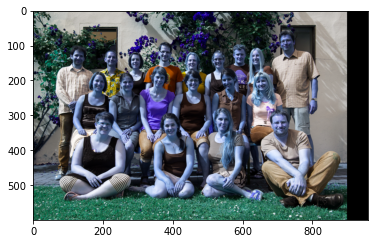

In [9]:
#Read image
img = cv2.imread(image_path,cv2.IMREAD_COLOR )
#calculate h and w
(h, w) = img.shape[:2]
print("dimensions: "+ str((h,w)) )
print("dimensions robot camera: "+ str((HEIGHT, WIDTH)) )
print((h,w)==(HEIGHT, WIDTH))

#cv2.imshow("image",img) #not working in Jupiter notebook
plt.imshow(img)
plt.show()

### HAAR CLASSIFIER FACE DETECTION

In [10]:
#Load Classifier
CASC_PATH = "./models/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(CASC_PATH)
print("CLASSIFIER LOADED")

CLASSIFIER LOADED


BEFORE:


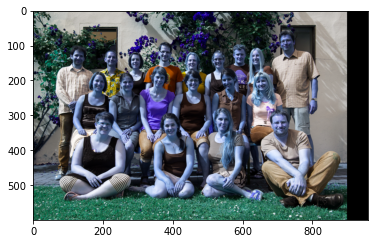

faces detected:  15
RESULT


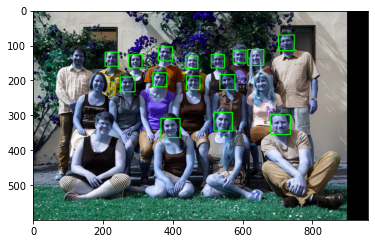

In [11]:
img_haar = img.copy() #copy img
print("BEFORE:")
plt.imshow(img_haar)
plt.show()

#gray_img = cv2.cvtColor(img_haar, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray_img)
#plt.show()

#FORWARD
faces = face_cascade.detectMultiScale(img_haar, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
print("faces detected: ",faces.shape[0])

#draw bounding boxes
for face in faces:
    x, y, w, h = face
    cv2.rectangle(img_haar, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
print("RESULT")
plt.imshow(img_haar)
plt.show()

### DNN FACE DETECTION

In [14]:
#Load net
PROTO = "./models/res10_deploy.prototxt"
MODEL = "./models/res10_300x300_ssd_iter_140000_fp16.caffemodel"
net = cv2.dnn.readNetFromCaffe(PROTO, MODEL)
print("Net Loaded")

Net Loaded


BEFORE:


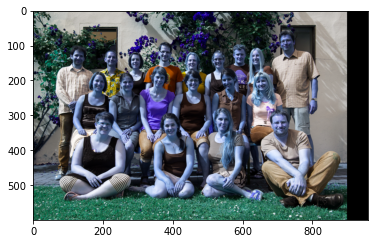

detected: 189
RESULT


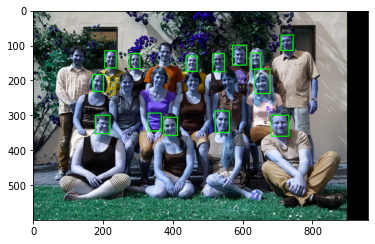

True

In [15]:
img_dnn = img.copy() #copy img
print("BEFORE:")
plt.imshow(img_dnn)
plt.show()

#FORWARD image
#blob = cv2.dnn.blobFromImage(cv2.resize(img_dnn, (300, 300)), 1.0, (300, 300), (104.0, 117.0, 123.0))
blob = cv2.dnn.blobFromImage(img_dnn, 1.0, (300, 300), [104, 117, 123], False, False)
net.setInput(blob)
detections = net.forward()
print("detected: " + str(detections.shape[2]))

#draw bounding box
conf_threshold=0.15
bboxes = []
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > conf_threshold:
        x1 = int(detections[0, 0, i, 3] * WIDTH)
        y1 = int(detections[0, 0, i, 4] * HEIGHT)
        x2 = int(detections[0, 0, i, 5] * WIDTH)
        y2 = int(detections[0, 0, i, 6] * HEIGHT)
        cv2.rectangle(img_dnn, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
print("RESULT")       
plt.imshow(img_dnn)
plt.show()

cv2.imwrite("./img/save.png",img_dnn)

### Object Detection

In [16]:
#Load net
PROTO = "./models/MobileNetSSD_deploy.prototxt"
MODEL = "./models/MobileNetSSD_deploy.caffemodel"
net = cv2.dnn.readNetFromCaffe(PROTO, MODEL)
print("Net Loaded")

Net Loaded


BEFORE:


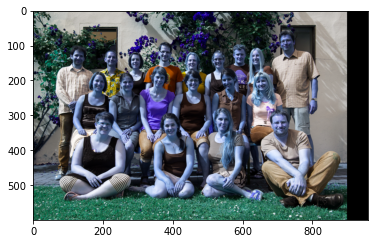

detected: 17
RESULT


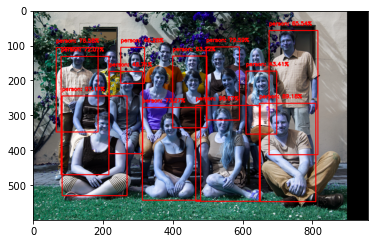

True

In [17]:
img_obj = img.copy() #copy img
print("BEFORE:")
plt.imshow(img_obj)
plt.show()

RESIZED_DIMENSIONS = (300, 300) # Dimensions net was trained on. 
IMG_NORM_RATIO = 0.007843 # In grayscale a pixel can range between 0 and 255
 
classes =  ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", 
            "bus", "car", "cat", "chair", "cow", 
           "diningtable",  "dog", "horse", "motorbike", "person", 
           "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

# Capture the frame's height and width
(h, w) = img_obj.shape[:2]


#FORWARD image
# Create a blob. A blob is a group of connected pixels in a binary 
# frame that share some common property (e.g. grayscale value)
# Preprocess the frame to prepare it for deep learning classification
blob = cv2.dnn.blobFromImage(cv2.resize(img_obj, RESIZED_DIMENSIONS), 
             IMG_NORM_RATIO, RESIZED_DIMENSIONS, 127.5)

# Set the input for the neural network
net.setInput(blob)
# Predict the objects in the image
neural_network_output = net.forward()
print("detected: " + str(neural_network_output.shape[2]))


#draw bounding box
# Put the bounding boxes around the detected objects
for i in np.arange(0, neural_network_output.shape[2]):
    confidence = neural_network_output[0, 0, i, 2]
    # Confidence must be at least x%       
    if confidence > 0.40:
        idx = int(neural_network_output[0, 0, i, 1])

        bounding_box = neural_network_output[0, 0, i, 3:7] * np.array(
            [w, h, w, h])

        (startX, startY, endX, endY) = bounding_box.astype("int")

        label = "{}: {:.2f}%".format(classes[idx], confidence * 100) 

        cv2.rectangle(img_obj, (startX, startY), (
            endX, endY), (255,0,0), 2)     

        y = startY - 15 if startY - 15 > 15 else startY + 15    

        cv2.putText(img_obj, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

print("RESULT")       
plt.imshow(img_obj)
plt.show()

cv2.imwrite("./img/save.png",img_obj)

### Yolo Obj Detector

In [18]:
#Load net
modelConfig  = "./models/yolov3-openimages.cfg"
modelWeigths = "./models/yolov3-openimages.weights"
net = cv2.dnn.readNet(modelConfig, modelWeigths)
print("Net Loaded")

Net Loaded
